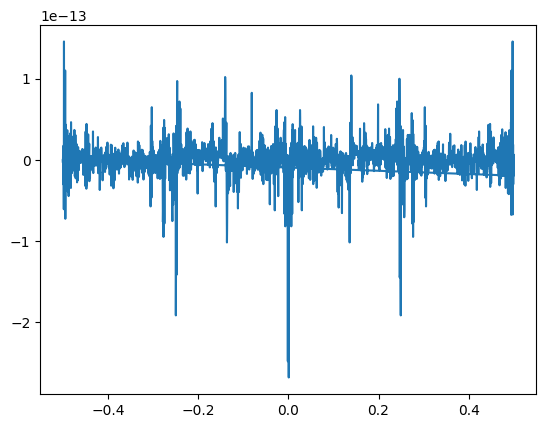

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
t = np.arange(0, 3, 1e-3)
s = np.sin(2 * pi * t)
sp = np.fft.fft(s)
freq = np.fft.fftfreq(t.shape[-1])
# print(freq)
plt.plot(freq, sp.real)
# plt.plot(t, s)
# plt.show()

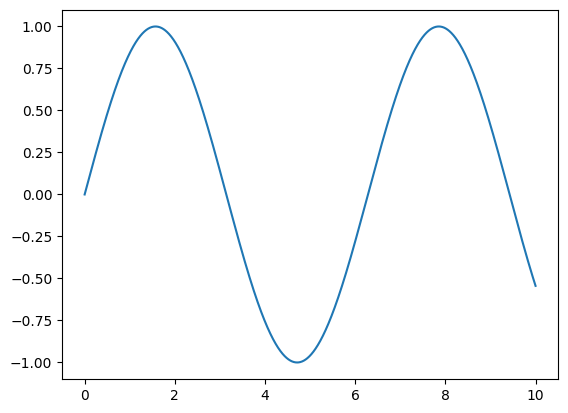

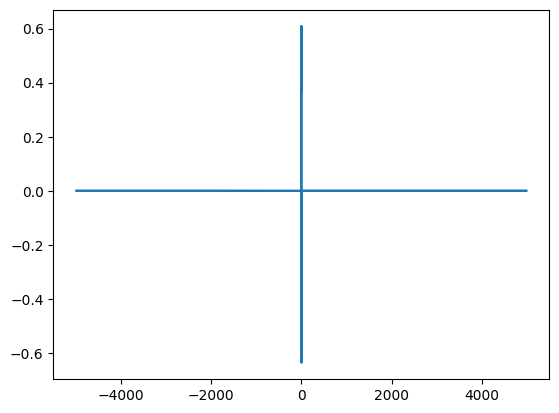

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# 产生正弦信号
Ts = 1e-4
t = np.arange(0, 10, Ts)
x = np.sin(t)
 
# FFT变换
X = np.fft.fft(x, np.size(x, 0), axis = 0) / x.size * 2
freq = np.fft.fftfreq(np.size(x, 0), Ts)
 
plt.figure(1)
plt.plot(t, x)
plt.show()
plt.figure(2)
plt.plot(freq,np.real(X))
plt.show()

> https://www.jianshu.com/p/58630d0489ea

In [128]:
import matplotlib.pyplot as plt 
import numpy as np 
def show(ori_func, ft, sampling_period = 1): 
    n = len(ori_func) 
    interval = sampling_period / n 
    # 绘制原始函数
    plt.subplot(2, 1, 1) 
    plt.plot(np.arange(0, sampling_period, interval), ori_func, 'black') 
    plt.xlabel('Time'), plt.ylabel('Amplitude') 
    # 绘制变换后的函数
    plt.subplot(2,1,2) 
    frequency = np.arange(n / 2) / (n * interval) 
    # frequency = np.arange(n / 2)
    nfft = abs(ft[range(int(n / 2))] / n ) 
    plt.plot(frequency, nfft, 'red') 
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum') 
    plt.show() 

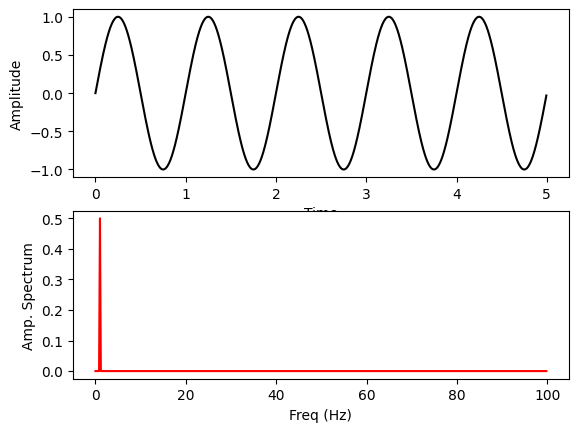

In [49]:
time = np.arange(0, 5, .005) 
x = np.sin(2 * np.pi * 1 * time) 
y = np.fft.fft(x) 
show(x, y) 

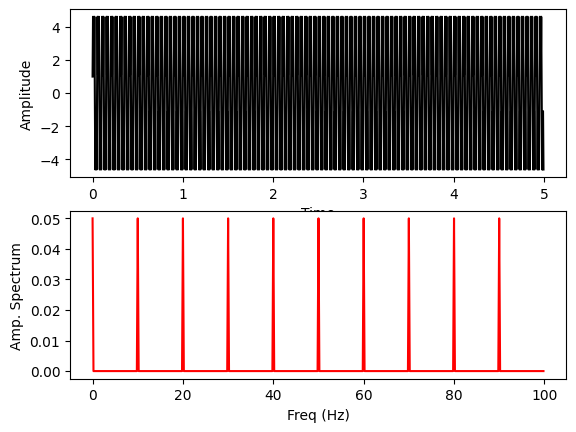

In [58]:
# 将其与频率为 20 和 60 的波叠加起来
x2 = np.sin(2 * np.pi * 20 * time) 
x3 = np.sin(2 * np.pi * 60 * time) 
x += x2 + x3 
y = np.fft.fft(x) 
# print(y)
show(x, y) 

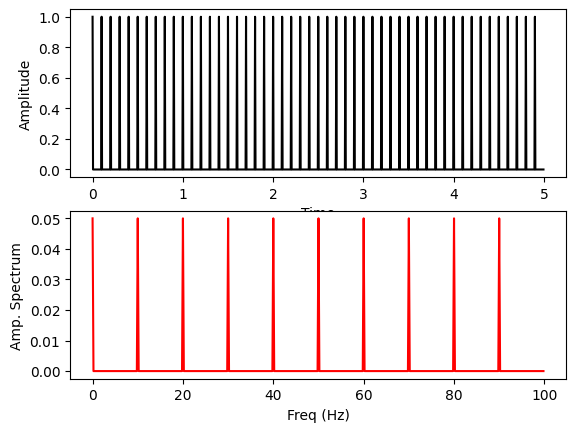

In [65]:
# 生成方波，振幅是 1，频率为 10Hz
# 我们的间隔是 0.05s，每秒有 200 个点
# 所以需要每隔 20 个点设为 1
x = np.zeros(len(time)) 
x[::20] = 1 
y = np.fft.fft(x) 
# print(len(x), len(y))
# show(x, y) 
# print(np.real(y))
show(x, np.real(y))

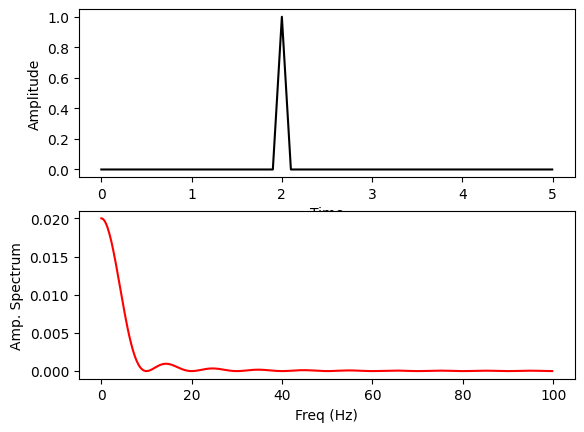

In [54]:
# 生成脉冲波
x = np.zeros(len(time)) 
x[380:400] = np.arange(0, 1, .05) 
x[400:420] = np.arange(1, 0, -.05) 
y = np.fft.fft(x) 
show(x, y) 

In [179]:
import matplotlib.pyplot as plt 
import numpy as np 
def show(ori_func, ft, sampling_period = 0.512): 
    n = len(ori_func) 
    interval = sampling_period / n 
    # print(interval)
    # 绘制原始函数
    plt.subplot(2, 1, 1) 
    N = np.arange(0, sampling_period, interval)
    print(len(N))
    plt.plot(N, ori_func, 'black') 
    plt.xlabel('Time'), plt.ylabel('Amplitude') 
    # 绘制变换后的函数
    plt.subplot(2,1,2) 
    frequency = np.arange(n / 2) / (n * interval) 
    # frequency = np.arange(n / 2)
    nfft = abs(ft[range(int(n / 2))] / (sampling_period * 1e3 / 2)) 
    plt.plot(frequency, nfft, 'red') 
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum') 
    plt.show() 
    # return nfft
    
    for i, f in enumerate(nfft):
        if f <= 1e-2: nfft[i] = 0
    with open("D:/GitRepo/transformer-study-cases/Transformer FFT/note/test.txt", "a") as f:
        f.write(str(nfft))

512
512


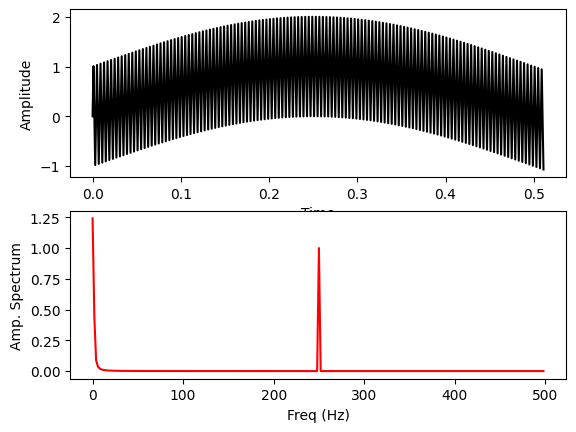

In [180]:
time = np.arange(0, 0.512, 1e-3) 
print(len(time))
x = np.sin(2 * np.pi * 1 * time) + np.sin(2 * np.pi * 250 * time)
y = np.fft.fft(x) 
show(x, y) 

In [183]:
file = "D:/GitRepo/transformer-study-cases/Transformer FFT/note/test.txt"

In [186]:
with open(file, "r") as f:
    data = f.read()
    print(len(data))
    print(data[1])

5062
1


## 随机生成TDOA数据

In [10]:
from math import sqrt
from random import random

In [41]:
(x, y, z) = (random(), random(), 0)
print((x, y, z))

(0.5602043080380144, 0.49447397096135937, 0)


In [43]:
s1, s2, s3 = (0, 1, 1), (1, 0, 1), (1, 1, 1)

In [121]:
from random import random
import numpy as np

def TDOA():
    ss = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 1]])
    x = np.array([random(), random(), 0])
    # x = np.array([0,0,0])
    d = []
    for s in ss:
        d.append(np.linalg.norm(s - x)) 
    return d, [d[0] - n for n in d][1:]

TDOA()

([1.2471988602880717, 1.4121873978834218, 1.5758048280901231],
 [-0.16498853759535015, -0.3286059678020514])

In [75]:
signal = np.zeros(400)
print(signal.shape)
for i in range(10):
    signal[i::20] = 1
signal

(400,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1.

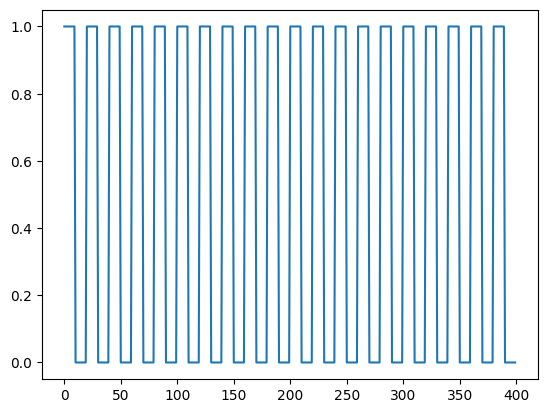

In [123]:
import matplotlib.pyplot as plt

axis = np.arange(400)
plt.plot(axis, signal)

In [115]:
import math

In [120]:
pow(math.e, -math.sqrt(3))

0.17692120631776423

> 衰减系数: $\eta(l) = e^{-l}$ 其中 $l$ 为到发射源距离。

### 获得随机目标x发射给三个接收器的考虑衰减的信号

In [341]:
def get_sig(x, detectors, tgt_sig, re_num):
    """
    x: 目标坐标
    detectors: 接收器坐标
    tgt_sig: 目标发射的信号
    re_num: 接收器接收的信号点数
    """
    print(x)
    # 目标与不同接收器的距离
    d = [np.linalg.norm(s - x) for s in detectors]
    # print(d)
    start = [round(n * 100) for n in d]
    # print(start)
    decay = [round(1.09282 * (1 - i) + 1, 4) for i in d]  # 0.8 * (1 - i) / (sqrt(3) - 1) + 1 
    # print(decay)
    # 衰减、延迟后的信号
    sig = np.array([tgt_sig[start[i]:start[i] + re_num] * decay[i] * 1000 for i in range(len(detectors))], dtype = "int")
    # sig = np.array([tgt_sig[start[i]:start[i] + re_num] * decay[i] for i in range(len(detectors))], dtype = "float32")
    print(sig, len(sig), type(sig))
    return sig

In [342]:
import random

x = np.array([round(random.random(), 3), round(random.random(), 3), 0])
detectors = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 1]])
tgt_sig = signal
re_num = 100

[0.404 0.311 0.   ]
[[694 694   0   0   0   0   0   0   0   0   0   0 694 694 694 694 694 694
  694 694 694 694   0   0   0   0   0   0   0   0   0   0 694 694 694 694
  694 694 694 694 694 694   0   0   0   0   0   0   0   0   0   0 694 694
  694 694 694 694 694 694 694 694   0   0   0   0   0   0   0   0   0   0
  694 694 694 694 694 694 694 694 694 694   0   0   0   0   0   0   0   0
    0   0 694 694 694 694 694 694 694 694]
 [776 776 776 776 776 776 776 776 776 776   0   0   0   0   0   0   0   0
    0   0 776 776 776 776 776 776 776 776 776 776   0   0   0   0   0   0
    0   0   0   0 776 776 776 776 776 776 776 776 776 776   0   0   0   0
    0   0   0   0   0   0 776 776 776 776 776 776 776 776 776 776   0   0
    0   0   0   0   0   0   0   0 776 776 776 776 776 776 776 776 776 776
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 614 614 614 614 614 614 614 614 614 614   0   0   0
    0   0   0   0   0   0   0 614 614 614 614 614 614 614 614 614 614   0
    0 

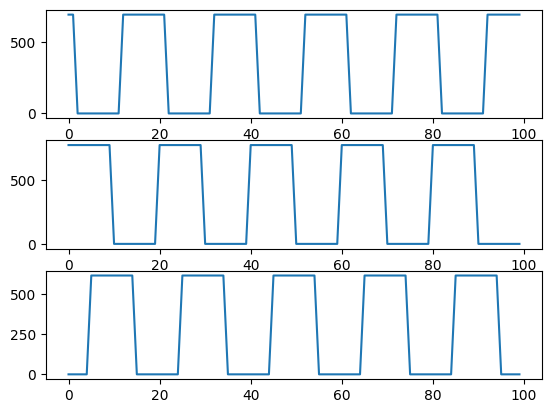

In [343]:
sig = get_sig(x, detectors, tgt_sig, re_num)
axis = np.arange(100)
for i, s in enumerate(sig):
    plt.subplot(3, 1, i + 1)
    plt.plot(axis, s)

> 将输出值映射为[0, 1000] 之间的整数，即将输入看作长度为100的句子，构成句子的语言词表大小为1000

In [344]:
a = np.array([[1,2,3]])
b = np.array([[4,5,6]])
c = np.array([[[1,2], [3,4]]])
# np.concatenate(c, 1)
np.concatenate(sig, 0)

array([694, 694,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 694,
       694, 694, 694, 694, 694, 694, 694, 694, 694,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 694, 694, 694, 694, 694, 694, 694,
       694, 694, 694,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       694, 694, 694, 694, 694, 694, 694, 694, 694, 694,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 694, 694, 694, 694, 694, 694,
       694, 694, 694, 694,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 694, 694, 694, 694, 694, 694, 694, 694, 776, 776, 776, 776,
       776, 776, 776, 776, 776, 776,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 776, 776, 776, 776, 776, 776, 776, 776, 776, 776,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 776, 776, 776,
       776, 776, 776, 776, 776, 776, 776,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 776, 776, 776, 776, 776, 776, 776, 776, 776,
       776,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 77

In [4]:
import torch
import numpy as np
data = torch.from_numpy(np.random.randint(1, 10, size = (8, 10), dtype = "int64"))
data.shape

torch.Size([8, 10])

In [5]:
def gen(n):
    for i in range(n):
        yield i

In [7]:
for g in gen(4):
    print(g)

0
1
2
3


## 两矩阵快速计算行向量之间的欧氏距离

> https://zhuanlan.zhihu.com/p/349041864

设矩阵 $A_{m \times n}$, 矩阵 $B_{t \times n}$, 则:
$$dist = \sqrt{A^2 \times 1_{n \times t} + (B^2 \times 1_{n \times m})^T - 2A \times B^T}$$

In [41]:
a = np.random.random((10,2))
b = np.zeros(10)
x = np.column_stack((a, b))
detectors = np.array([[1, 0, 1], [0, 1, 1], [1, 1, 1]])
print(x, x.shape, "\n", detectors, detectors.shape)

[[0.14450631 0.95880615 0.        ]
 [0.5406625  0.29746147 0.        ]
 [0.47172794 0.33409891 0.        ]
 [0.78668717 0.22928033 0.        ]
 [0.94089009 0.24645722 0.        ]
 [0.72151015 0.41949414 0.        ]
 [0.41324474 0.87655938 0.        ]
 [0.53258867 0.32654351 0.        ]
 [0.40860436 0.38465473 0.        ]
 [0.17860331 0.05180333 0.        ]] (10, 3) 
 [[1 0 1]
 [0 1 1]
 [1 1 1]] (3, 3)


In [42]:
def dist(A, B):
    m, n = A.shape
    t, n1 = B.shape
    if n != n1: return
    ones1 = np.ones((n, t))
    ones2 = np.ones((n, m))
    dist = np.sqrt(np.matmul(np.square(A), ones1) + \
                   np.transpose(np.matmul(np.square(B), ones2)) \
                   - 2 * np.matmul(A, np.transpose(B)))
    return dist

In [99]:
d = dist(x, detectors)
print(d)

[[1.62824405 1.01122649 1.31664968]
 [1.13994485 1.33636684 1.30558467]
 [1.17927666 1.29071744 1.31243881]
 [1.04788923 1.48757706 1.28043398]
 [1.03161773 1.56623781 1.25352331]
 [1.1196124  1.36292478 1.18934589]
 [1.45349169 1.08904031 1.16598427]
 [1.15113162 1.31802668 1.29306496]
 [1.22380883 1.24322457 1.31468574]
 [1.29513555 1.38959565 1.60429718]]


In [100]:
decay = 1.09282 *(1 - d) + 1
decay

array([[0.31344234, 0.98773147, 0.65395889],
       [0.84706547, 0.63241159, 0.66605096],
       [0.80408288, 0.68229816, 0.65856062],
       [0.94766569, 0.46716604, 0.69353614],
       [0.96544751, 0.381204  , 0.72294465],
       [0.86928517, 0.60338854, 0.79307902],
       [0.50441522, 0.90269497, 0.81860907],
       [0.83484034, 0.65245408, 0.67973275],
       [0.75541723, 0.73419933, 0.65610513],
       [0.67746996, 0.57424208, 0.33961196]])

In [101]:
start = np.array(d * 100, dtype = "int")
start

array([[162, 101, 131],
       [113, 133, 130],
       [117, 129, 131],
       [104, 148, 128],
       [103, 156, 125],
       [111, 136, 118],
       [145, 108, 116],
       [115, 131, 129],
       [122, 124, 131],
       [129, 138, 160]])

In [109]:
res = None
for i, s in enumerate(start):
    if i == 0:
        res = np.concatenate(tuple((signal[s[j]: s[j] + 10] * decay[i][j] for j in range(len(s)))), 0)
    else:
        res = np.vstack((res, np.concatenate(tuple((signal[s[j]: s[j] + 10] * decay[i][j] for j in range(len(s)))), 0)))
np.array(res * 1000, dtype = "int")

array([[313, 313, 313, 313, 313, 313, 313, 313,   0,   0, 987, 987, 987,
        987, 987, 987, 987, 987, 987,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 653],
       [  0,   0,   0,   0,   0,   0,   0, 847, 847, 847,   0,   0,   0,
          0,   0,   0,   0, 632, 632, 632,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 804, 804, 804, 804, 804, 804, 804, 682,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 658],
       [947, 947, 947, 947, 947, 947,   0,   0,   0,   0, 467, 467,   0,
          0,   0,   0,   0,   0,   0,   0, 693, 693,   0,   0,   0,   0,
          0,   0,   0,   0],
       [965, 965, 965, 965, 965, 965, 965,   0,   0,   0,   0,   0,   0,
          0, 381, 381, 381, 381, 381, 381, 722, 722, 722, 722, 722,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 869,   0,   0,   0,
          0, 603, 603, 603, 603, 603, 603,   0,   0,

In [112]:
x

array([[0.14450631, 0.95880615, 0.        ],
       [0.5406625 , 0.29746147, 0.        ],
       [0.47172794, 0.33409891, 0.        ],
       [0.78668717, 0.22928033, 0.        ],
       [0.94089009, 0.24645722, 0.        ],
       [0.72151015, 0.41949414, 0.        ],
       [0.41324474, 0.87655938, 0.        ],
       [0.53258867, 0.32654351, 0.        ],
       [0.40860436, 0.38465473, 0.        ],
       [0.17860331, 0.05180333, 0.        ]])

In [113]:
np.around(x, 3)

array([[0.145, 0.959, 0.   ],
       [0.541, 0.297, 0.   ],
       [0.472, 0.334, 0.   ],
       [0.787, 0.229, 0.   ],
       [0.941, 0.246, 0.   ],
       [0.722, 0.419, 0.   ],
       [0.413, 0.877, 0.   ],
       [0.533, 0.327, 0.   ],
       [0.409, 0.385, 0.   ],
       [0.179, 0.052, 0.   ]])

In [4]:
import torch
from torch import from_numpy
import numpy as np
from torch.autograd import Variable

def data_generator(V, batch_size, batch_num):
    """
    V: 随即生成数据的上界 + 1
    batch_size: 一次喂给网络多少个数据样本
    batch_num: 一共喂多少次
    """
    for _ in range(batch_num):
        data = from_numpy(np.random.randint(1, V, size = (batch_size, 10), dtype = "int64"))  # 每一条数据里包含 10 个数
        data[:, 0] = 1  # 将数据的第一列全部设置为 1 ，作为起始标志
        source = Variable(data, requires_grad = False)
        target = Variable(data, requires_grad = False)  # 源数据与目标数据一致并且不随着梯度更新而改变
        
        yield (source, target)

In [5]:
for d in data_generator(10, 5, 2):
    print(d[0], d[0].shape)
    print(d[1], d[1].shape)

tensor([[1, 2, 3, 9, 6, 2, 5, 3, 6, 8],
        [1, 4, 3, 3, 3, 7, 4, 7, 9, 2],
        [1, 6, 2, 8, 7, 5, 4, 5, 6, 1],
        [1, 5, 9, 8, 5, 3, 2, 1, 4, 7],
        [1, 8, 9, 6, 8, 8, 7, 5, 1, 1]]) torch.Size([5, 10])
tensor([[1, 2, 3, 9, 6, 2, 5, 3, 6, 8],
        [1, 4, 3, 3, 3, 7, 4, 7, 9, 2],
        [1, 6, 2, 8, 7, 5, 4, 5, 6, 1],
        [1, 5, 9, 8, 5, 3, 2, 1, 4, 7],
        [1, 8, 9, 6, 8, 8, 7, 5, 1, 1]]) torch.Size([5, 10])
tensor([[1, 1, 8, 6, 5, 9, 7, 8, 6, 2],
        [1, 4, 7, 4, 8, 7, 8, 9, 5, 9],
        [1, 5, 8, 3, 6, 2, 4, 5, 2, 6],
        [1, 4, 6, 9, 3, 8, 5, 8, 4, 4],
        [1, 8, 7, 3, 4, 4, 6, 7, 2, 4]]) torch.Size([5, 10])
tensor([[1, 1, 8, 6, 5, 9, 7, 8, 6, 2],
        [1, 4, 7, 4, 8, 7, 8, 9, 5, 9],
        [1, 5, 8, 3, 6, 2, 4, 5, 2, 6],
        [1, 4, 6, 9, 3, 8, 5, 8, 4, 4],
        [1, 8, 7, 3, 4, 4, 6, 7, 2, 4]]) torch.Size([5, 10])


In [6]:
a = np.ones((1, 10))
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [10]:
from_numpy(np.array(a * 10, dtype = "int64"))

tensor([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]])